In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define the TensorBoard callback
log_dir = "./logs"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard callback
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])


Epoch 1/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2725 - accuracy: 0.9220 - val_loss: 0.1203 - val_accuracy: 0.9648
Epoch 2/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0999 - accuracy: 0.9718 - val_loss: 0.0751 - val_accuracy: 0.9769
Epoch 3/10
938/938 [==============================] - 34s 36ms/step - loss: 0.0713 - accuracy: 0.9793 - val_loss: 0.0685 - val_accuracy: 0.9799
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0587 - accuracy: 0.9828 - val_loss: 0.0643 - val_accuracy: 0.9797
Epoch 5/10
938/938 [==============================] - 33s 36ms/step - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.0566 - val_accuracy: 0.9815
Epoch 6/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.0565 - val_accuracy: 0.9817
Epoch 7/10
938/938 [==============================] - 32s 35ms/step - loss: 0.0391 - accuracy: 0.9886 - val_loss: 0.0596 - val_accuracy:

In [2]:
## Ploting the loss

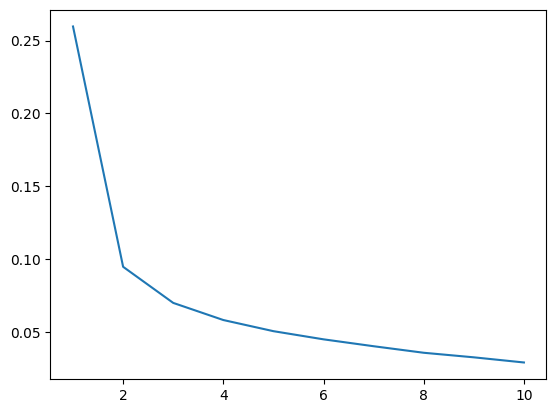

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.arange(1,11), history.history['loss'])